<a href="https://colab.research.google.com/github/temmyzeus/Tensorflow-Courses/blob/master/DeepLearning.AI%20TensorFlow%20Developer%20Professional%20Certificate/Natural%20Language%20Processing%20with%20Tensorflow/IMDB_Subwords8k_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from typing import Union, Dict
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, LSTM, Bidirectional

In [2]:
imdb, info = tfds.load(
    'imdb_reviews/subwords8k',
    with_info=True,
    as_supervised=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQ51CPB/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQ51CPB/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQ51CPB/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
train = imdb['train']
test = imdb['test']
# Get Subword Text Encoder
tokenizer = info.features['text'].encoder

In [4]:
# convert sample_tokens to text
sample_text = 'I\'m going to be a very good ML Engineer'
sample_tokens = tokenizer.encode(sample_text)

print(tokenizer.encode(sample_text), end='\n\n')
print(tokenizer.decode(sample_tokens))

[8002, 7968, 111, 215, 7, 35, 4, 67, 74, 8006, 3780, 1844, 1004, 1225, 8043]

I'm going to be a very good ML Engineer


Min Len : 11
Max Len:  3944
Median Len 253.0


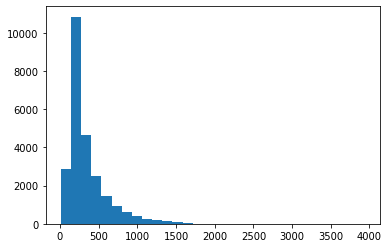

In [5]:
# Getting an Idea of teh distribution of token lengths
train_lens = np.array([len(_[0]) for _ in train])
print('Min Len :', np.min(train_lens))
print('Max Len: ', np.max(train_lens))
# Getting a good sense of the middle point, median seems better here
print('Median Len', np.median(train_lens))
plt.hist(train_lens, bins=30)
plt.show()

In [8]:
vocab_size = tokenizer.vocab_size
output_dim = 64
input_length = 500
BATCH_SIZE = 64
BUFFER_SIZE = 10000
EPOCHS = 20

In [9]:
train_ds = train.shuffle(buffer_size=BUFFER_SIZE)
train_padded = train_ds.padded_batch(
    batch_size=BATCH_SIZE,
    padded_shapes=tf.compat.v1.data.get_output_shapes(train)
)

test_padded = test.padded_batch(
    batch_size=BATCH_SIZE,
    padded_shapes=tf.compat.v1.data.get_output_shapes(test)
)

In [13]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=output_dim, input_length=input_length) ,
    Bidirectional(LSTM(units=output_dim)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
], name='IMDB_CLassifier')

In [14]:
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)
history = model.fit(
    train_padded,
    validation_data=test_padded,
    epochs = EPOCHS
)

Epoch 1/20
391/391 [==============================] - 167s 417ms/step - loss: 0.5126 - accuracy: 0.7568 - val_loss: 0.3866 - val_accuracy: 0.8416
Epoch 2/20
391/391 [==============================] - 163s 416ms/step - loss: 0.3554 - accuracy: 0.8632 - val_loss: 0.4287 - val_accuracy: 0.8269
Epoch 3/20
391/391 [==============================] - 161s 411ms/step - loss: 0.2928 - accuracy: 0.8892 - val_loss: 0.3759 - val_accuracy: 0.8604
Epoch 4/20
391/391 [==============================] - 160s 408ms/step - loss: 0.2591 - accuracy: 0.9035 - val_loss: 0.3738 - val_accuracy: 0.8535
Epoch 5/20
391/391 [==============================] - 158s 402ms/step - loss: 0.2352 - accuracy: 0.9148 - val_loss: 0.3901 - val_accuracy: 0.8489
Epoch 6/20
391/391 [==============================] - 159s 406ms/step - loss: 0.2215 - accuracy: 0.9174 - val_loss: 0.4061 - val_accuracy: 0.8434
Epoch 7/20
391/391 [==============================] - 158s 403ms/step - loss: 0.1971 - accuracy: 0.9298 - val_loss: 0.3889 -

KeyboardInterrupt: ignored

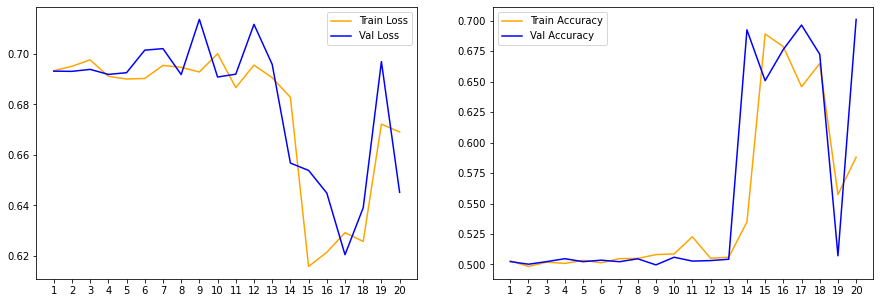

In [17]:
def plot_loss_acc(history: Union[tf.keras.callbacks.History, Dict]):
    if isinstance(history, tf.keras.callbacks.History):
        history = history.history
    elif isinstance(history, dict):
        pass
    else:
        raise TypeError

    epochs_axis = list(map(int, list(range(1, len(history['loss'])+1))))
    plt.figure(figsize=(15, 5))
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    ax1.plot(epochs_axis, history['loss'], color='orange', label='Train Loss')
    ax1.plot(epochs_axis, history['val_loss'], color='b', label='Val Loss')
    ax1.set_xticks(ticks=epochs_axis)
    ax1.legend()

    ax2.plot(epochs_axis, history['accuracy'], color='orange', label='Train Accuracy')
    ax2.plot(epochs_axis, history['val_accuracy'], color='b', label='Val Accuracy')
    ax2.set_xticks(ticks=epochs_axis)
    ax2.legend()
    plt.show()

plot_loss_acc(history)

In [18]:
model.summary()

Model: "IMDB_CLassifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 64)           523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________
